<a href="https://colab.research.google.com/github/abhivadali13/nba-draft-lottery-monte-carlo-simulator/blob/main/vadali_abhi_nbadraftlottery_montecarlosimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IS597PR Final Projects – Spring 2021

Due Dates: 

By Apr 2 = proposal in Moodle forum; Presentations in class or pre-recorded Apr26 & May 3
along with draft-stage completion; Peer voting on projects open May 3-5; May 10 @ noon=All finalized
files in GitHub for grading.

Overview and High-Level Requirements:
Many previous students have done nice work, of which they and I were proud. In a few cases, their
projects and this course directly helped them get a job. You have an even wider range of choices
available than most earlier semesters, so just avoid the pitfalls, apply yourselves the best you can and
try to have some fun with it.
1. You may choose to work as teams of 1, 2, or 3 students. Multi-member teams must clearly show
collaboration from every member and are expected to perform at a proportionally-increased level
of complexity, sophistication, depth, and/or scope to earn a high grade. Projects will be evaluated
and graded as a teamwork product. You must work together, and hold each other accountable for
contributions, quality, and ethical behavior. If there’s a problem early on (such as someone insists
on plagiarizing, notify the instructor immediately).
2. Select from one of these TYPES of analytics projects to implement in Python:

  I. Your original Monte Carlo simulation

3. Do not choose a statistical Machine Learning-focused project. Enroll in Machine Learning Team
Projects if that interests you. Thus, packages such as sklearn, PyTorch and TensorFlow and similar
should not be used here. NLP-focused projects are also out of scope.
4. You must submit your original unique work, created specifically for 597PR. If the project is related
to work you did earlier or are now doing for any other course or a job, then you must get prior
written approval from all the relevant instructors and the supervisor. Not doing so is subject to
sanctions per the Student Code.
5. PROPOSAL Stage. Post your summary into Moodle’s “Final Project Topic Proposals” forum. See
expected information there.
6. CITE ALL YOUR SOURCES! Any citation style is fine, but make sure you do it and do so continuously,
not just at the very end. Students who have used code or other material without indicating its true
source AND clearly delineating which parts are not original will be reported to the iSchool & UI
Grad College through FAIR. If the review confirms plagiarism, the sanction is reduced grade
(dependent on scope) with a course grade of F for significant cases, regardless of your previous
scores. 
7. Unlike all other assignments in 597PR, you are allowed and expected to openly publish your unique
project work. You may consider it part of your student portfolio, link it from resume, etc. Typically,
this is done on Github.com since you’ll be committing there as work proceeds. Make sure
everything you put there is work you’ll be proud of. At every commit, you should be verifying
citations for all code, data, etc. Remember every commit is a “version” of the project and is public.
It is expected to be a FORK from here: https://github.com/iSchool-597PR/2021Spring_finals
8. Draft Stage & Peer Reviews: The program and documentation should be sufficiently operational for
meaningful and beneficial peer code review, but does not have to be 100% finished. Make sure
your GitHub repository is up to date with all the work you’ve done so far (code, documentation,
example outputs). It’s okay if there are some final scenario explorations or even minor flaws left to
resolve in your project at this stage, but you want constructive feedback from others. All students
will also be submitting evaluations about other teams’ projects, details will be given in class.
9. Presentations: You will create and deliver a presentation to the class (either live in Zoom or as prerecorded video in Illinois MediaSpace) that summarizes your project’s purpose, hypotheses, design
reasoning, and results so far, possibly with a quick demo.
10. Final submission expectations:
 Edit your README.md to create a good introduction and overview of the project, written
with new visitors to your repository in mind. Summarize the conclusions you came up with,
including how results are either supportive of or refute your hypotheses. You can embed
images into the README file, if that is relevant.
 Use the “Factors in Code Quality and Code Reviews” like a checklist. Apply as many of the
skills we’ve discussed this semester as applicable, to create the best quality program you
can. Example expectations:
i. Doctests and/or pyunit tests: 1-person team minimum 30% actual test coverage; 2-
person minimum 50% actual test coverage; (3-person minimum 80% actual coverage
AND use Travis-CI or GitHub Actions to automate the test suite during your
development, not just after it's complete).
ii. All functions, (methods included) need complete Docstrings. 1-person=minimum 4
functions; 2-person=7+ functions; 3-person= 10+ functions
iii. 3-person teams also should incorporate one of these efficiency techniques that will
be discussed in class: Selective compilation (e.g. Numba or Cython); and/or parallel
processing.
 Consider each hypothesis or alternative situation you proposed to investigate (you may
have added more after feedback). Your program code should be able to run the simulation
for all of the hypotheses just by changing top-level parameter values and/or through using
different input data files -- do not hard-code such configuration aspects into the functions
themselves

***(Type I projects) Specifics for Monte Carlo Simulations:***

 Design your own scenario -- make certain your simulation is original in some way(s).
 You can simulate an engineering or manufacturing problem, business/management
situation, (certain types of) human behaviors, physical phenomena, or a game. To
encourage original thinking, AVOID scenarios that have been done many times an
Page 3
discussed in class, such as : a "random walk" of stock prices, stock options, or similarly
naïve financial “predictions”; a traffic simulation with just a few intersections or only one
road; parking lots or parking meters; customer seating/dining at a restaurant or serving
them at a counter; the games Tic-tac-toe, four*-in-a-row, Go-moku, chutes and ladders,
Monopoly, Rock-Paper-Scissors, Blackjack, Poker. If you want to model a sports game or
tournament, ask first, too many of these have been done already.

You must have several well-chosen random variables in the model, to explore a variety of
possible outcomes and derive the non-obvious probabilities of the overall model. Make
sure you think carefully to choose appropriate ranges of values and a sensible distribution
type for every randomized aspect. For example, if you simulate “number of swimmers in
the pool” at each point in time as a uniform distribution, it’s wrong. If you simulate the
individual finish times of all runners in a marathon as uniform, triangular, or even normal,
it’s wrong. We’ll discuss this in class.

  - i. 1-person teams must have at least 2 different kinds of randomized variables plus the
deterministic aspects and control variables in the model. Most interesting
simulations require more.
  - ii. 2-person teams must have at least 3 different kinds …
  - iii. 3-person teams must have at least 4 different kinds …

Controls & Experiments: 1-person teams must have at least 1 hypothesis to test by running
an experiment using the simulation in different modes to compare the results. Multi-person
teams are expected to go further, typically testing multiple hypotheses with corresponding
experiments, but variations can have other manifestations.

If there is any relevant public data available, try to incorporate real data as part of your
simulation model. For example, any useful sports simulation must use some real
performance statistics about players and/or teams, so its randomized variables can be
sampled from realistic ranges & distributions. If data you seek is not in downloadable form,
you can still research the scenario to make realistic estimate

Source List:
- https://www.geeksforgeeks.org/permutation-and-combination-in-python/
- https://pypi.org/project/nba-api/
- https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb
- https://stackoverflow.com/questions/35532498/animation-in-ipython-notebook
- https://pynative.com/python-random-randrange/#:~:text=Use%20randint()%20Generate%20random,8%20%2C9%2C%2010%5D
- https://machinelearningmastery.com/discrete-probability-distributions-for-machine-learning/
- https://www.kite.com/python/answers/how-to-rename-a-dictionary-key-in-python#:~:text=Use%20dict.,dictionary%20key%20to%20this%20value.
- https://www.kite.com/python/answers/how-to-change-the-seaborn-plot-figure-size-in-python#:~:text=Set%20the%20figsize%20argument%20in,pyplot.&text=Save%20the%20result%20to%20a,to%20change%20the%20figure%20size.
- https://basketball.realgm.com/nba/draft/lottery_results/1985

# **NBA Draft Lottery: A Monte Carlo Simulation**

## **Initial Set Up**

In [1]:
#importing the required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations, permutations
from collections import Counter
import random
import requests
import warnings
import time

from matplotlib import rc, animation
rc('animation', html='html5')
from ipywidgets import Image
from IPython import display
import scipy.stats as ss
from numpy.random import multinomial
from decimal import *
from google.colab import drive

In [2]:
#mounting my drive on Google Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#cd'ing into the folder for this project
%cd "/content/drive/MyDrive/IS 597PR: Programming for Analytics and Data Processing/Final Project"

/content/drive/MyDrive/IS 597PR: Programming for Analytics and Data Processing/Final Project


## **Ping Pong Ball Combinations**

The first step in our NBA Draft Lottery simulation is to create all the combinations of 4 balls selected from balls numbered 1-14

In [38]:
#we generate a list of combinations of 14 choose 4
#each item in this list represents a possible combination that can be drawn on lottery night
#one combination is left unassigned to a team, this combination is generally is 11-12-13-14
def combinations_creator(simulation_type):
    if simulation_type == 'r' or simulation_type == 'R' or simulation_type == 'w' or simulation_type == 'W' or simulation_type == 'a' or simulation_type == 'A':
        ball_combinations = combinations([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 4)
        ball_combinations = list(ball_combinations)
        excluded_combination = (11, 12, 13, 14)
        return ball_combinations, excluded_combination

## **Odds**

The next step in our NBA Draft Lottery simulation is to create and assign all the teams in the lottery their odds based on their seed

In [39]:
#each team is given their respective odds based on their position in the standings 
#we generate an array containing all the odds of each team
#these odds represent the team's chances of obtaining the number 1 pick in the NBA Draft
#the teams with the higher odds are lower seeded teams, and the ones with lower odds are better teams
def odds_creator(simulation_type, iteration_counter, playoff_team, wild_card_odds):
    if simulation_type == 'r' or simulation_type == 'R' or simulation_type == 'w' or simulation_type == 'W' or simulation_type == 'a' or simulation_type == 'A':
        rockets_odds = 0.14
        timberwolves_odds = 0.14
        pistons_odds = 0.14
        magic_odds = 0.125
        thunder_odds = 0.105
        cavaliers_odds = 0.09
        kings_odds = 0.075
        raptors_odds = 0.06
        bulls_odds = 0.045
        wizards_odds = 0.03
        pelicans_odds = 0.02
        pacers_odds = 0.015
        warriors_odds = 0.01
        spurs_odds = 0.005

        if simulation_type == 'w' or simulation_type == 'W':
            if iteration_counter == 1:
              mu, sigma = 0.07, 0.035 
              wild_card_odds = np.round(np.random.normal(mu, sigma, 1), 3) #using a normal dist. to determine odds of wild card team
              while wild_card_odds <= 0 or wild_card_odds >= 0.14: #we should not have a wild card team with non-positive odds or odds greater than the top possible odds
                wild_card_odds = np.round(np.random.normal(mu, sigma, 1), 3)
            randomizer = random.randint(1,5)
            if randomizer == 1:
              rockets_odds -= wild_card_odds
            elif randomizer == 2:
              timberwolves_odds -= wild_card_odds
            elif randomizer == 3:
              pistons_odds -= wild_card_odds
            elif randomizer == 4:
              magic_odds -= wild_card_odds
            else:
              thunder_odds -= wild_card_odds

    elif simulation_type == 'm' or simulation_type == 'M':
        rockets_odds = [0.14, 0.134, 0.127, 0.12, 0.479, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        timberwolves_odds = [0.14, 0.134, 0.127, 0.120, 0.278, 0.20, 0, 0, 0, 0, 0, 0, 0, 0]
        pistons_odds = [0.14, 0.134, 0.127, 0.120, 0.148, 0.260, 0.07, 0, 0, 0, 0, 0, 0, 0]
        magic_odds = [0.125, 0.122, 0.119, 0.115, 0.072, 0.257, 0.167, 0.022, 0, 0, 0, 0, 0, 0]
        thunder_odds = [0.105, 0.105, 0.106, 0.105, 0.022, 0.196, 0.267, 0.087, 0.006, 0, 0, 0, 0, 0]
        cavaliers_odds = [0.09, 0.092, 0.094, 0.096, 0, 0.086, 0.297, 0.206, 0.037, 0.002, 0, 0, 0, 0]		
        kings_odds = [0.075, 0.078, 0.081, 0.085, 0, 0, 0.197, 0.341, 0.129, 0.013, 0, 0, 0, 0]
        raptors_odds = [0.06, 0.063, 0.067, 0.072, 0, 0, 0, 0.345, 0.321, 0.067, 0.004, 0, 0, 0]
        bulls_odds = [0.045, 0.048, 0.052, 0.057, 0, 0, 0, 0, 0.507, 0.259, 0.03, 0.001, 0, 0]
        wizards_odds = [0.03, 0.033, 0.036, 0.04, 0, 0, 0, 0, 0, 0.659, 0.190, 0.012, 0, 0]
        pelicans_odds = [0.02, 0.022, 0.024, 0.028, 0, 0, 0, 0, 0, 0, 0.776, 0.126, 0.004, 0]
        pacers_odds = [0.015, 0.017, 0.019, 0.021, 0, 0, 0, 0, 0, 0, 0, 0.861, 0.067, 0.001]
        warriors_odds = [0.01, 0.011, 0.012, 0.014, 0, 0, 0, 0, 0, 0, 0, 0, 0.929, 0.023]
        spurs_odds = [0.005, 0.006, 0.006, 0.007, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.976]

    elif simulation_type == 'o' or simulation_type == 'O':
        nba_rigging_result = bernoulli_random_trial()

        if nba_rigging_result == 1: #nba rigging was a success
          

    odds_dictionary = {'Houston Rockets': rockets_odds, 'Minnesota Timberwolves': timberwolves_odds, 'Detroit Pistons': pistons_odds, 'Orlando Magic': magic_odds, 'Oklahoma City Thunder': thunder_odds, 'Cleveland Cavaliers': cavaliers_odds, 'Sacramento Kings': kings_odds, 'Toronto Raptors': raptors_odds, 'Chicago Bulls': bulls_odds, 
                      'Washington Wizards': wizards_odds, 'New Orleans Pelicans': pelicans_odds, 'Indiana Pacers': pacers_odds, 'Golden State Warriors': warriors_odds, 'San Antonio Spurs': spurs_odds}

    if simulation_type == 'w' or simulation_type == 'W':
      if iteration_counter == 1:
          playoff_teams = ['Charlotte Hornets', 'Boston Celtics', 'Miami Heat', 'Atlanta Hawks', 'New York Knicks', 'Milwaukee Bucks', 'Brooklyn Nets', 'Philadelphia 76ers',
                          'Utah Jazz', 'Pheonix Suns', 'Los Angeles Clippers', 'Denver Nuggets', 'Dallas Mavericks', 'Portland Trail Blazers', 'Los Angeles Lakers',
                          'Memphis Grizzlies']
          playoff_team_selector = random.randint(0, len(playoff_teams) - 1)
          playoff_team = playoff_teams[playoff_team_selector]
          print('The Wild Card Playoff Team selected to participate in the NBA Draft Lottery is the:', playoff_team)
          print('The', playoff_team, 'will enter the NBA Draft Lottery with:', str(wild_card_odds), 'odds of obtaining the #1 pick')
      
      odds_dictionary[playoff_team] = wild_card_odds

    return odds_dictionary, playoff_team, wild_card_odds

In [40]:
#we temporarily remove the unassigned ping pong ball from the list of ping pong ball combinations and re-assign it back after
#we first generate 1000 random numbers from 0 through 1000
#we assign each team the appropriate number of combinations based on their odds
def odds_assigner(ping_pong_combinations, discarded_combination, odds_dict): 
    ping_pong_combinations.remove(discarded_combination)
    random_indices = random.sample(range(len(ping_pong_combinations)), 1000)
    random_indices_length = len(random_indices)
    combinations_dictionary = {}
    for i in odds_dict.keys():
      sample = int(odds_dict[i] * random_indices_length)
      draw = random.sample(random_indices, sample)
      for j in draw:
        if draw[0] == j:
          combinations_dictionary[i] = [ping_pong_combinations[j]]
        else:
          combinations_dictionary[i].append(ping_pong_combinations[j])
        random_indices.remove(j)
    ping_pong_combinations.append(discarded_combination)
    return combinations_dictionary

## **Ball Drawing**

Now, we simulate the drawing of the balls themselves. The way this is done in the NBA Draft Lottery is that the ping-pong machine with all 14 balls numbered 1-14 is spun for 20 seconds, then a ball is drawn, then it is spun for 10 seconds, then another ball is drawn, then it is spun for another 10 seconds, then another ball is drawn, and then it is spun for another 10 seconds, and the last ball is drawn. These four balls make up a four number combination.

Then, whichever team has the given combination is found and assigned the given pick. 

In [41]:
#in order to simulate the selection of the balls, we first create a list of numbers from 1-15
#then, we "mix" the balls for 1/100000 of the time they are mixed in the actual NBA Draft Lottery
#and during this time, we shuffle the list; after this, we randomly select a number from the list 
#and this number represents the first ball drawn (it is then removed from the list and the process is repeated until 4 balls are drawn)
def ball_combination_picker():
    ping_pong_balls = list(range(1, 15))
    number_of_balls_picked = 0
    ball_combination = []
    
    while number_of_balls_picked < 4:
      number_of_balls_picked += 1
      start = time.time()
      time.time()
      elapsed = 0

      if number_of_balls_picked == 1:
        mixing_seconds = 0.0002
      else:
        mixing_seconds = 0.0001

      while elapsed < mixing_seconds:
        random.shuffle(ping_pong_balls)
        elapsed = time.time() - start
        print("Shuffling ping pong balls; ", elapsed, "seconds elapsed...")
        time.sleep(.0001)  
      chosen_ball = random.choice(ping_pong_balls)
      print("The chosen ball is: ", chosen_ball)
      ball_combination.append(chosen_ball)
      ping_pong_balls.remove(chosen_ball)

    return ball_combination

In [42]:
#once the combination of balls is drawn, we must check which team actually has been assigned this combination
#in order to do this, we look at all the permutations of the ball combination and compare it to the combinations
#assigned to each team and the unassigned combination to see which one the combination belongs to 
def team_selector(four_ball_combination, displaced_combination, teams_combinations):
    ball_combinations = list(permutations(four_ball_combination, 4))
    unassigned_four_ball_combinations = list(permutations(displaced_combination, 4))
    for i in ball_combinations:
        if i in unassigned_four_ball_combinations:
          return True

        for j in teams_combinations:
            if i in teams_combinations[j]:
                return j

## **Lottery Simulation**

Simulating one round of the NBA Draft Lottery. Drawing different ball combinations until the teams who have the first four picks of the NBA Draft are decided, and then filling out the rest of the lottery in reverse standings order.

In [59]:
#this simulator calls on the ball_combination_picker() and team_selector() methods to run a full simulation of one NBA Draft Lottery
#based on the first four teams that are assigned picks, the simulator goes in order based on a list of the teams in order of odds that
#are remaining and assigns them the picks 5-12
def lottery_results(dictionary_combinations, combination_unassigned, input_user):
    team_aggregate_stats = {}
    team_order = 1
    lottery_order = list(dictionary_combinations.keys())
    pick_limit = 0

    if input_user == 'r' or input_user == 'R' or input_user == 'w' or input_user =='W':
        pick_limit = 4
        pick_number = 5

    elif input_user == 'a' or input_user == 'A':
        pick_limit = 14
    
    while team_order <= pick_limit:
        ball_combination = ball_combination_picker()
        team = team_selector(ball_combination, combination_unassigned, dictionary_combinations)
        print()

        if team in lottery_order:
            print("The number #", team_order, " pick in the 2021 NBA Draft goes to: ", team)
            if team not in team_aggregate_stats:
                team_aggregate_stats[team] = [team_order]
            else:
                team_aggregate_stats[team].append(team_order)
            print()
            lottery_order.remove(team)
            team_order += 1

    if input_user != 'a' and input_user != 'A':
      if input_user == 'r' or input_user == 'R':
        total_pick_limit = 14
    
      elif input_user == 'w' or input_user == 'W':
        total_pick_limit = 15

      print()
      print("Picks 5 -", total_pick_limit, "are in this order: ")
      for j in lottery_order:
          if pick_number != total_pick_limit:
            print(j + ", ")
          else:
            print(j)

          if j not in team_aggregate_stats:
              team_aggregate_stats[j] = [pick_number]
          else:
              team_aggregate_stats[j].append(pick_number)
          pick_number += 1

    print('___________________')
    return team_aggregate_stats

## **Formatting and Plotting the Results of the simulation**

Taking in the final aggregate results of which picks each team got and how many times in the simulation and obtaining a visual view of this.

In [60]:
#uses the Counter function to count the number of times each team got each pick
#essentially cleans up the aggregate data into a more digestible form
def team_stats_calculator(team_stats):
    formatted_team_stats = {}
    for i in team_stats:
        formatted_team_stats[i] = Counter(team_stats[i])
    return formatted_team_stats

In [61]:
#creates two lists, one that contains each team's names, and one that contains
#their associated picks from the simulation...these are used to generate a plot
#that provides a visual understanding of the simulation
def team_data_plotter(team_aggregate_data):

  #renaming 14 of the keys so that they appear more easily readable on the plot
  new_key = "Kings"
  old_key = "Sacramento Kings"
  team_aggregate_data[new_key] = team_aggregate_data.pop(old_key)

  new_key = "Pistons"
  old_key = "Detroit Pistons"
  team_aggregate_data[new_key] = team_aggregate_data.pop(old_key)

  new_key = "Cavs"
  old_key = "Cleveland Cavaliers"
  team_aggregate_data[new_key] = team_aggregate_data.pop(old_key)

  new_key = "Rockets"
  old_key = "Houston Rockets"
  team_aggregate_data[new_key] = team_aggregate_data.pop(old_key)

  new_key = "Wolves"
  old_key = "Minnesota Timberwolves"
  team_aggregate_data[new_key] = team_aggregate_data.pop(old_key)

  new_key = "Magic"
  old_key = "Orlando Magic"
  team_aggregate_data[new_key] = team_aggregate_data.pop(old_key)

  new_key = "Thunder"
  old_key = "Oklahoma City Thunder"
  team_aggregate_data[new_key] = team_aggregate_data.pop(old_key)

  new_key = "Raptors"
  old_key = "Toronto Raptors"
  team_aggregate_data[new_key] = team_aggregate_data.pop(old_key)

  new_key = "Bulls"
  old_key = "Chicago Bulls"
  team_aggregate_data[new_key] = team_aggregate_data.pop(old_key)

  new_key = "Wizards"
  old_key = "Washington Wizards"
  team_aggregate_data[new_key] = team_aggregate_data.pop(old_key)

  new_key = "Pelicans"
  old_key = "New Orleans Pelicans"
  team_aggregate_data[new_key] = team_aggregate_data.pop(old_key)

  new_key = "Pacers"
  old_key = "Indiana Pacers"
  team_aggregate_data[new_key] = team_aggregate_data.pop(old_key)

  new_key = "Warriors"
  old_key = "Golden State Warriors"
  team_aggregate_data[new_key] = team_aggregate_data.pop(old_key)

  new_key = "Spurs"
  old_key = "San Antonio Spurs"
  team_aggregate_data[new_key] = team_aggregate_data.pop(old_key)


  team_list = []
  pick_list = []
  for i in team_aggregate_data:
    for j in team_aggregate_data[i].items():
      k = 0
      while k < int(j[1]):
        team_list.append(i)
        pick_list.append(j[0])
        k += 1

  fig_dims = (20, 10)
  fig, ax = plt.subplots(figsize=fig_dims)
  x = team_list
  y = pick_list
  print('___________________')
  print()
  print("The following plot summarizes our simulations of the NBA Draft Lottery: ")
  print()
  sns.stripplot(x = x, y = y, alpha=0.5,s=10,linewidth=1.0, jitter=True)

In [62]:
def team_sim_data(team_info, sim_count):
  print()
  print('The following statistics summarize our simulations of the NBA Draft Lottery: ')
  print()
  hypothesis_1_count = 0
  hypothesis_1_indices = []
  hypothesis_2_count = 0
  hypothesis_2_indices = []

  for i in team_info:
    picks = []
    for j in team_info[i].items():
      k = 0
      while k < int(j[1]):
        picks.append(j[0])
        k += 1
        
    print(i, "simulation statistics: ")
    print()
    print("Average Pick: " + str(np.mean(picks)))
    print("Standard Deviation of Picks: " + str(np.std(picks)))
    print("Lowest Pick: #" + str(np.max(picks)))
    print("Highest Pick: #" + str(np.min(picks)))
    print()

    if (i == 'Oklahoma City Thunder' or i == 'Cleveland Cavaliers' or i == 'Sacramento Kings' or i == 'Toronto Raptors'):
      for i, k in enumerate(picks):
        if k <= 4 and i not in hypothesis_1_indices:
          hypothesis_1_count += 1
          hypothesis_1_indices.append(i)
    
    if (i == 'Houston Rockets' or i =='Minnesota Timberwolves' or i == 'Detroit Pistons'):
      for i, k in enumerate(picks):
        if k >= 7 and i not in hypothesis_2_indices:
          hypothesis_2_count += 1
          hypothesis_2_indices.append(i)

  print('___________________')
  print()
  if (hypothesis_1_count/(sim_count - 1) >= 0.25):
    print("Hypothesis 1 is: True")
  else:
    print("Hypothesis 1 is: False")

  print()
  if (hypothesis_2_count/(sim_count - 1) >= 0.40):
    print("Hypothesis 2 is: True")
  else:
    print("Hypothesis 2 is: False")

## **Running the simulation using a Multinomial Distribution**

In [134]:
def multinomial_simulator(odds, counter):
  print()
  for i in odds:
    simulations = multinomial(counter, odds[i])
    for j in range(len(simulations)):
      print(i + ' Pick %d: %d ' % (j + 1, simulations[j]))
    print()

## **Bernoulli Random Trial to see if the NBA gets caught rigging the NBA Draft Lottery**

In [7]:
def bernoulli_random_trial():
  x = 1
  success_rate = 0.7
  Y = np.random.binomial(1, success_rate, x)
  return Y

In [13]:
def nba_rigging_odds(bernoulli_result):
  pacers_odds = 0.1429
  clippers_odds = 0.1429
  supersonics_odds = 0.1429
  hawks_odds = 0.1429
  kings_odds = 0.1429
  warriors_odds = 0.1429

  if bernoulli_result == 1:
    print('The NBA was not caught attempting to rig the 1985 NBA Draft Lottery')
    print()
    mu, sigma = 0.25, 0.1 
    knicks_odds = np.round(np.random.normal(mu, sigma, 1), 3) #using a normal dist. to determine odds of rigged knicks pick
    while knicks_odds <= 0 or knicks_odds >= 0.2858: #knicks should not have non-positive odds or odds that will reduce other teams' odds to negative values
      knicks_odds = np.round(np.random.normal(mu, sigma, 1), 3)
    randomizer = random.randint(1,6)
    if randomizer == 1:
      pacers_odds -= (knicks_odds - 0.1429)
    elif randomizer == 2:
      clippers_odds -= (knicks_odds - 0.1429)
    elif randomizer == 3:
      supersonics_odds -= (knicks_odds - 0.1429)
    elif randomizer == 4:
      hawks_odds -= (knicks_odds - 0.1429)
    elif randomizer == 5:
      kings_odds -= (knicks_odds - 0.1429)
    else:
      warriors_odds -= (knicks_odds - 0.1429)
    print('The New York Knicks rigged odds are now:', knicks_odds)

  else:
    print('The NBA was caught attempting to rig the 1985 NBA Draft Lottery')
    print()
    knicks_odds = 0.01
    randomizer = random.randint(1,6)
    if randomizer == 1:
      pacers_odds += (0.1429 - knicks_odds)
    elif randomizer == 2:
      clippers_odds += (0.1429 - knicks_odds)
    elif randomizer == 3:
      supersonics_odds += (0.1429 - knicks_odds)
    elif randomizer == 4:
      hawks_odds += (0.1429 - knicks_odds)
    elif randomizer == 5:
      kings_odds += (0.1429 - knicks_odds)
    else:
      warriors_odds += (0.1429 - knicks_odds)
    print('The New York Knicks odds after punishment are now:', knicks_odds)

  print(knicks_odds)

  return [knicks_odds, pacers_odds, clippers_odds, supersonics_odds, hawks_odds, kings_odds, warriors_odds]

In [37]:
def nba_1985_draft_lottery_simulator(team_odds):
  team_list = ['New York Knicks', 'Indiana Pacers', 'Los Angeles Clippers', 'Seattle SuperSonics', 'Atlanta Hawks', 'Sacramento Kings', 'Golden State Warriors']
  pick_list = []
  pick_number = 1
  while pick_number <= 5:
    simulations = multinomial(1, team_odds)
    pick_list.append(team_list[np.argmax(simulations)])
    team_odds.pop(np.argmax(simulations))
    team_list.pop(np.argmax(simulations))
    pick_number += 1

  for i in team_list:
    if i not in pick_list:
      pick_list.append(i)
  print(pick_list)

In [38]:
i = 0
while i <= 1000:
  result = bernoulli_random_trial()
  result2 = nba_rigging_odds(result)
  nba_1985_draft_lottery_simulator(result2)
  i += 1

Streaming output truncated to the last 5000 lines.
The NBA was caught attempting to rig the 1985 NBA Draft Lottery

The New York Knicks odds after punishment are now: 0.01
0.01
['New York Knicks', 'Sacramento Kings', 'Golden State Warriors', 'Seattle SuperSonics', 'Atlanta Hawks', 'Indiana Pacers', 'Los Angeles Clippers']
The NBA was caught attempting to rig the 1985 NBA Draft Lottery

The New York Knicks odds after punishment are now: 0.01
0.01
['Sacramento Kings', 'Indiana Pacers', 'Los Angeles Clippers', 'Atlanta Hawks', 'Golden State Warriors', 'New York Knicks', 'Seattle SuperSonics']
The NBA was caught attempting to rig the 1985 NBA Draft Lottery

The New York Knicks odds after punishment are now: 0.01
0.01
['Golden State Warriors', 'Seattle SuperSonics', 'Sacramento Kings', 'Atlanta Hawks', 'Los Angeles Clippers', 'New York Knicks', 'Indiana Pacers']
The NBA was not caught attempting to rig the 1985 NBA Draft Lottery

The New York Knicks rigged odds are now: [0.19]
[0.19]
['New 

[0.1405]


## **Running the simulation based on User Input**

Based on given information, I will run a specific simulation the given number of times the user indicates.


NBA DRAFT LOTTERY ITERATION:  1



Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  3.600120544433594e-05 seconds elapsed...
Shuffling ping pong balls;  0.0015425682067871094 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  2.574920654296875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0015153884887695312 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  2.09808349609375e-05 seconds elapsed...
Shuffling ping pong balls;  0.002094745635986328 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  2.193450927734375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003616809844970703 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Minnesota Timberwolves

Shuffling ping pong balls;  2.1219253540039062e-05 seconds elapsed...
Shuffling ping pong balls;  0.0015668869018554688 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  2.193450927734375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003745555877685

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  3.218650817871094e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003387928009033203 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  2.3365020751953125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003197193145751953 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  2.193450927734375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003554821014404297 seconds elapsed...
The chosen ball is:  5
Shuffling ping pong balls;  1.9311904907226562e-05 seconds elapsed...
Shuffling ping pong balls;  0.000316619873046875 seconds elapsed...
The chosen ball is:  10

The number # 1  pick in the 2021 NBA Draft goes to:  Washington Wizards

Shuffling ping pong balls;  2.5987625122070312e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003108978271484375 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  2.0503997802734375e-05 seconds elapsed...
Shuffling ping pong balls;  0.000349521636962

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  3.170967102050781e-05 seconds elapsed...
Shuffling ping pong balls;  0.0013747215270996094 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  2.0503997802734375e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003082752227783203 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  2.4318695068359375e-05 seconds elapsed...
Shuffling ping pong balls;  0.00036025047302246094 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  2.2172927856445312e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003571510314941406 seconds elapsed...
The chosen ball is:  6

The number # 1  pick in the 2021 NBA Draft goes to:  Oklahoma City Thunder

Shuffling ping pong balls;  2.574920654296875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0004558563232421875 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  2.1219253540039062e-05 seconds elapsed...
Shuffling ping pong balls;  0.000300645828

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  2.86102294921875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0048139095306396484 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  2.5987625122070312e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003676414489746094 seconds elapsed...
The chosen ball is:  12
Shuffling ping pong balls;  1.9550323486328125e-05 seconds elapsed...
Shuffling ping pong balls;  0.00031256675720214844 seconds elapsed...
The chosen ball is:  9
Shuffling ping pong balls;  1.621246337890625e-05 seconds elapsed...
Shuffling ping pong balls;  0.000308990478515625 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Minnesota Timberwolves

Shuffling ping pong balls;  2.384185791015625e-05 seconds elapsed...
Shuffling ping pong balls;  0.00031948089599609375 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  2.3126602172851562e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003399848937

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  2.5510787963867188e-05 seconds elapsed...
Shuffling ping pong balls;  0.008742809295654297 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  2.3365020751953125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0008814334869384766 seconds elapsed...
The chosen ball is:  4
Shuffling ping pong balls;  2.3603439331054688e-05 seconds elapsed...
Shuffling ping pong balls;  0.000324249267578125 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  2.002716064453125e-05 seconds elapsed...
Shuffling ping pong balls;  0.005609750747680664 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Houston Rockets

Shuffling ping pong balls;  2.6226043701171875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0013763904571533203 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  2.3603439331054688e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002765655517578125 

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  3.147125244140625e-05 seconds elapsed...
Shuffling ping pong balls;  0.004230022430419922 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  2.1696090698242188e-05 seconds elapsed...
Shuffling ping pong balls;  0.00030875205993652344 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  2.0742416381835938e-05 seconds elapsed...
Shuffling ping pong balls;  0.0011162757873535156 seconds elapsed...
The chosen ball is:  3
Shuffling ping pong balls;  2.2411346435546875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003523826599121094 seconds elapsed...
The chosen ball is:  14

The number # 1  pick in the 2021 NBA Draft goes to:  Orlando Magic

Shuffling ping pong balls;  2.6464462280273438e-05 seconds elapsed...
Shuffling ping pong balls;  0.001565694808959961 seconds elapsed...
The chosen ball is:  10
Shuffling ping pong balls;  2.384185791015625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0014052391052246094 

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  3.170967102050781e-05 seconds elapsed...
Shuffling ping pong balls;  0.008137702941894531 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  2.574920654296875e-05 seconds elapsed...
Shuffling ping pong balls;  0.003445148468017578 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  2.1696090698242188e-05 seconds elapsed...
Shuffling ping pong balls;  0.0018661022186279297 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  2.1219253540039062e-05 seconds elapsed...
Shuffling ping pong balls;  0.001865386962890625 seconds elapsed...
The chosen ball is:  2

The number # 1  pick in the 2021 NBA Draft goes to:  New Orleans Pelicans

Shuffling ping pong balls;  2.3126602172851562e-05 seconds elapsed...
Shuffling ping pong balls;  0.00036144256591796875 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  3.075599670410156e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005686283111572

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  2.47955322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.000370025634765625 seconds elapsed...
The chosen ball is:  1
Shuffling ping pong balls;  2.765655517578125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0005054473876953125 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  1.5735626220703125e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002467632293701172 seconds elapsed...
The chosen ball is:  11
Shuffling ping pong balls;  1.4781951904296875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002620220184326172 seconds elapsed...
The chosen ball is:  14

The number # 1  pick in the 2021 NBA Draft goes to:  Detroit Pistons

Shuffling ping pong balls;  1.3589859008789062e-05 seconds elapsed...
Shuffling ping pong balls;  0.0002675056457519531 seconds elapsed...
The chosen ball is:  8
Shuffling ping pong balls;  2.47955322265625e-05 seconds elapsed...
Shuffling ping pong balls;  0.0003609657287597656 se

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  2.3603439331054688e-05 seconds elapsed...
Shuffling ping pong balls;  0.008402824401855469 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  2.7894973754882812e-05 seconds elapsed...
Shuffling ping pong balls;  0.004786491394042969 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  2.288818359375e-05 seconds elapsed...
Shuffling ping pong balls;  0.015027046203613281 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  2.574920654296875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0033423900604248047 seconds elapsed...
The chosen ball is:  5

The number # 1  pick in the 2021 NBA Draft goes to:  Detroit Pistons

Shuffling ping pong balls;  2.1696090698242188e-05 seconds elapsed...
Shuffling ping pong balls;  0.00160980224609375 seconds elapsed...
The chosen ball is:  7
Shuffling ping pong balls;  2.2411346435546875e-05 seconds elapsed...
Shuffling ping pong balls;  0.0009729862213134766 seconds

Image(value=b'RIFF\xdc\xae&\x00WEBPVP8X\n\x00\x00\x00\x12\x00\x00\x00\xd3\x01\x00\x07\x01\x00ANIM\x06\x00\x00\…


Shuffling ping pong balls;  2.3126602172851562e-05 seconds elapsed...
Shuffling ping pong balls;  0.0031211376190185547 seconds elapsed...
The chosen ball is:  13
Shuffling ping pong balls;  1.8358230590820312e-05 seconds elapsed...
Shuffling ping pong balls;  0.0014090538024902344 seconds elapsed...
The chosen ball is:  14
Shuffling ping pong balls;  3.4332275390625e-05 seconds elapsed...
Shuffling ping pong balls;  0.00029277801513671875 seconds elapsed...
The chosen ball is:  2
Shuffling ping pong balls;  1.4781951904296875e-05 seconds elapsed...
Shuffling ping pong balls;  0.00030159950256347656 seconds elapsed...
The chosen ball is:  1

The number # 1  pick in the 2021 NBA Draft goes to:  Toronto Raptors

Shuffling ping pong balls;  2.2172927856445312e-05 seconds elapsed...
Shuffling ping pong balls;  0.0014216899871826172 seconds elapsed...
The chosen ball is:  6
Shuffling ping pong balls;  2.4318695068359375e-05 seconds elapsed...
Shuffling ping pong balls;  0.00023460388183593

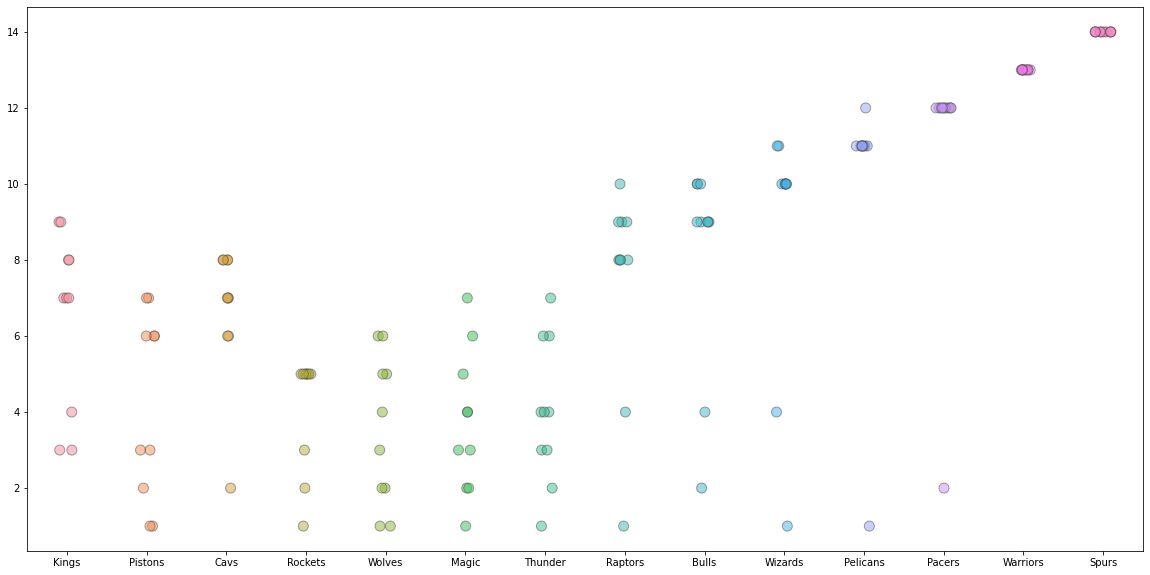

In [69]:
#main section of code
user_iterations = 1

#handle user input here
user_input = 'r'

#handle gif here
gif = 'nba_lottery.gif'
file = open(gif , "rb")
img = file.read()
lottery_gif = Image(
      value=img,
      format='gif',
      width=200,
      height=200)

aggregate_team_data = {}
team_from_playoffs = None
odds_wild_card = 0
while user_iterations <= 10:
    #handle lottery process here
    print()
    print("NBA DRAFT LOTTERY ITERATION: ", user_iterations)
    print()
    ping_pong_ball_combinations, unassigned_combination = combinations_creator(user_input)

    team_odds, team_from_playoffs, odds_wild_card = odds_creator(user_input, user_iterations, team_from_playoffs, odds_wild_card)

    if user_input == 's':
        count = 100
        multinomial_simulator(team_odds, count)
        user_iterations += 1

    else:
        team_combinations = odds_assigner(ping_pong_ball_combinations, unassigned_combination, team_odds)
        display.display(lottery_gif) #start of lottery shuffling
        print()
        team_results = lottery_results(team_combinations, unassigned_combination, user_input)
        print(team_results)
        if user_iterations == 1:
          aggregate_team_data = team_results
        else:
          for i in aggregate_team_data:
            aggregate_team_data[i] += team_results[i]
        user_iterations += 1

print()
team_counted_data = team_stats_calculator(aggregate_team_data)
team_sim_data(team_counted_data, user_iterations)
team_data_plotter(team_counted_data)

In [ ]:
odds = [.45, .05, .25, .25]
team_list = ['Knicks', 'Pacers', 'Sonics', 'Hawks']
pick_list = []
pick_number = 1
while pick_number <= 5:
    simulations = multinomial(1, odds)
    pick_list.append(team_list[np.argmax(simulations)])
    odds.pop(np.argmax(simulations))
    team_list.pop(np.argmax(simulations))
    pick_number += 1
print(pick_list)

In [251]:
a = [1, 2, 3, 4]
a.pop(2)

3

In [252]:
a

[1, 2, 4]